Tần suất cập nhật dữ liệu

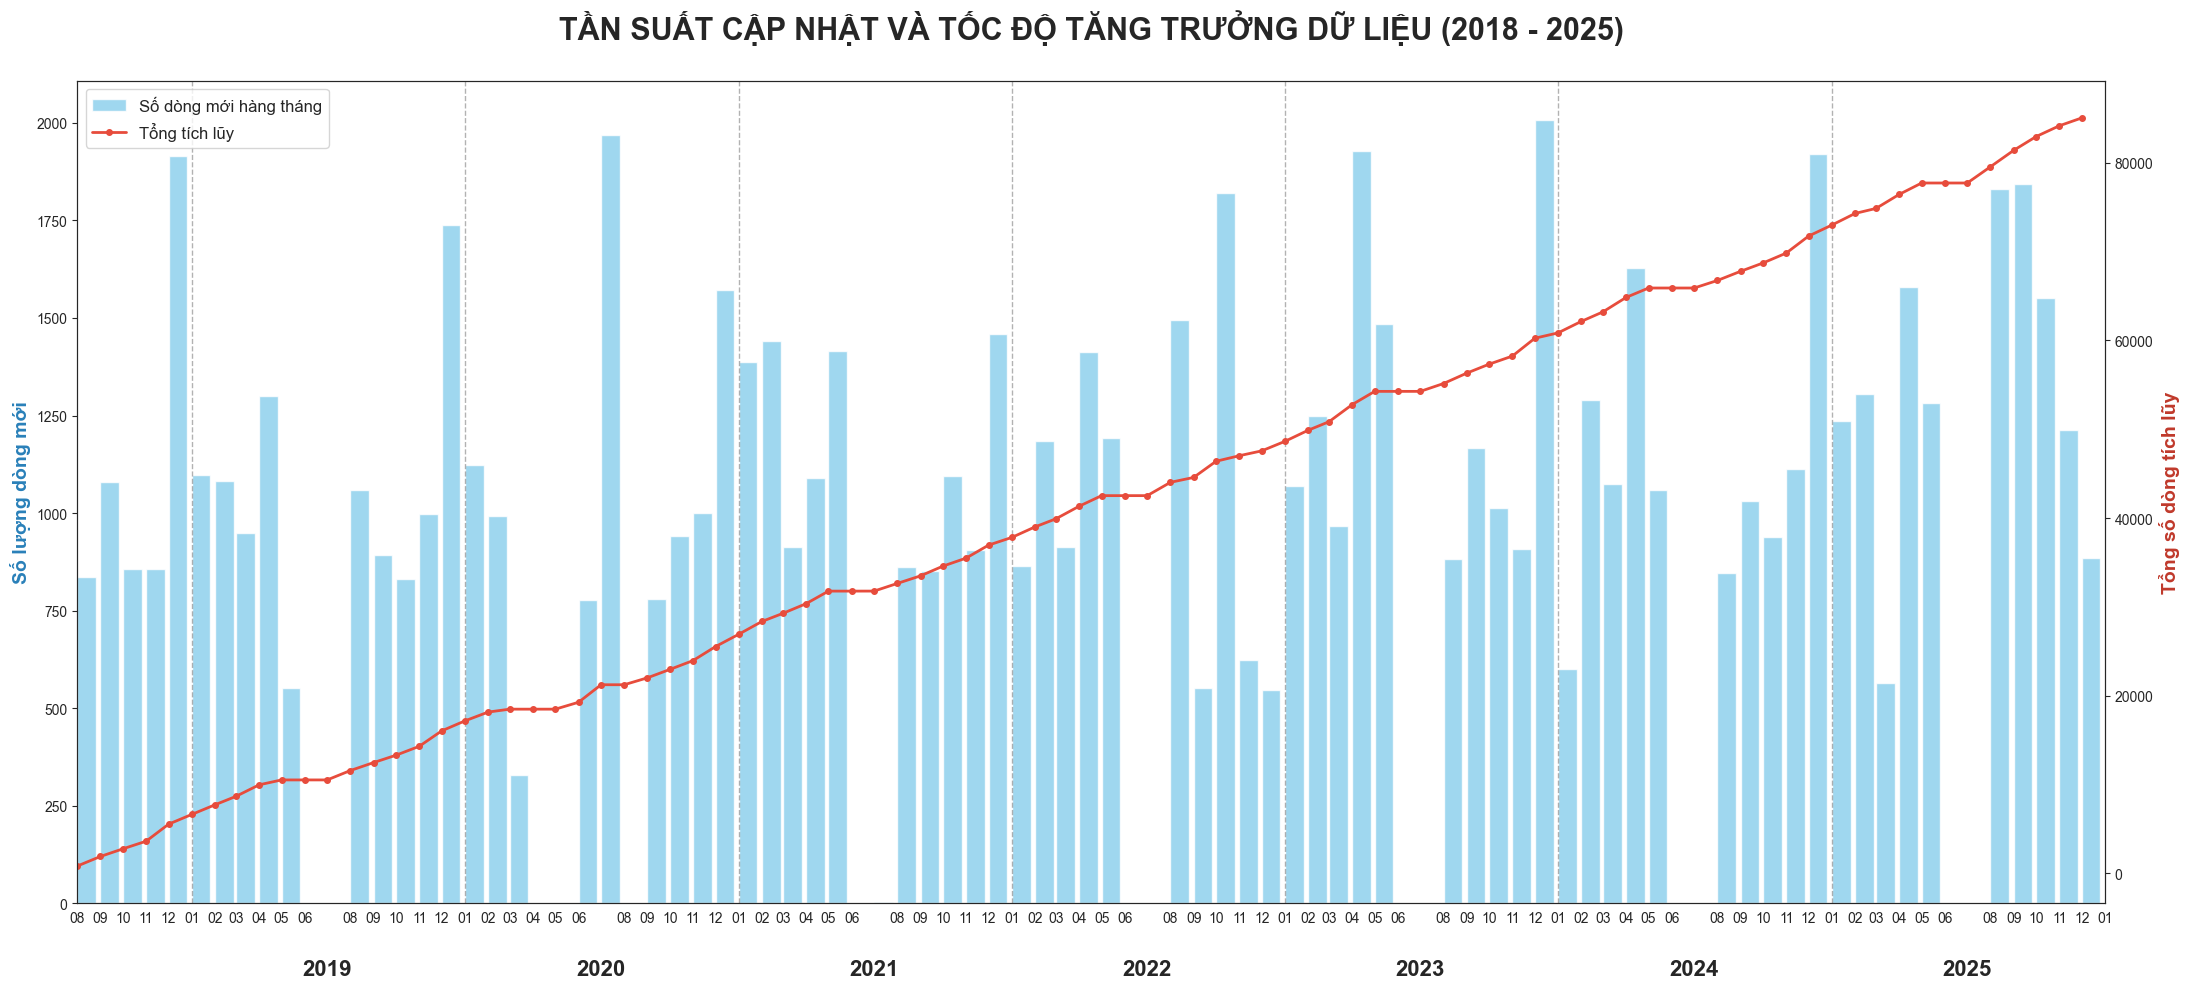

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# 1. Đọc dữ liệu
file_path = r"E:\project 1\data_18_25\matchlog\players_standard_matchlogs.csv"

try:
    # Đọc file
    df = pd.read_csv(file_path, low_memory=False)
    
    # CHỈNH SỬA QUAN TRỌNG: Khớp với định dạng Tháng/Ngày/Năm trong ảnh của bạn
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
    
    # Lọc dữ liệu từ 2018 đến 2025
    df = df[(df['Date'].dt.year >= 2018) & (df['Date'].dt.year <= 2025)]
    df = df.sort_values('Date') # Đảm bảo dữ liệu được sắp xếp theo thời gian

    # 2. Gom nhóm theo tháng
    # 'MS' giúp gom về ngày đầu tiên của tháng để các cột nằm đều nhau
    monthly_stats = df.resample('MS', on='Date').size().reset_index(name='row_count')
    monthly_stats['cumulative_count'] = monthly_stats['row_count'].cumsum()

    # 3. Vẽ biểu đồ
    sns.set_style("white")
    fig, ax1 = plt.subplots(figsize=(22, 10))

    # Vẽ cột (Số dòng mới) - Tăng width lên 25 để các cột khít nhau hơn
    ax1.bar(monthly_stats['Date'], monthly_stats['row_count'], 
            color='skyblue', width=25, alpha=0.8, label='Số dòng mới hàng tháng', align='edge')
    
    # Vẽ đường (Tích lũy)
    ax2 = ax1.twinx()
    ax2.plot(monthly_stats['Date'], monthly_stats['cumulative_count'], 
             color='#e74c3c', marker='o', markersize=4, linewidth=2, label='Tổng tích lũy')

    # 4. CẤU HÌNH TRỤC X ĐỂ KHÔNG BỊ LỆCH
    
    # --- Tầng 1: Hiển thị Tháng (01, 02...) ---
    ax1.xaxis.set_minor_locator(mdates.MonthLocator())
    ax1.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
    
    # --- Tầng 2: Hiển thị Năm (Căn giữa khối 12 tháng) ---
    # Chúng ta đặt nhãn năm vào ngày 01/07 của mỗi năm để nó nằm giữa năm đó
    years = range(monthly_stats['Date'].dt.year.min(), monthly_stats['Date'].dt.year.max() + 1)
    mid_year_points = [pd.Timestamp(year=y, month=7, day=1) for y in years]
    
    ax1.set_xticks(mid_year_points)
    ax1.set_xticklabels([str(y) for y in years], fontsize=16, fontweight='bold')

    # Tinh chỉnh vị trí nhãn
    ax1.tick_params(axis='x', which='major', pad=40, length=0) # Đẩy năm xuống dưới
    ax1.tick_params(axis='x', which='minor', labelsize=10)

    # --- Kẻ đường dọc phân chia ranh giới năm (vào đúng ngày 01/01) ---
    for year in years:
        ax1.axvline(pd.Timestamp(year=year, month=1, day=1), color='black', linestyle='--', alpha=0.3, linewidth=1)

    # Giới hạn trục X để biểu đồ gọn gàng
    ax1.set_xlim(monthly_stats['Date'].min(), monthly_stats['Date'].max() + pd.Timedelta(days=31))

    # Định dạng tiêu đề và nhãn
    ax1.set_ylabel('Số lượng dòng mới', color='#2980b9', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Tổng số dòng tích lũy', color='#c0392b', fontsize=14, fontweight='bold')
    plt.title('TẦN SUẤT CẬP NHẬT VÀ TỐC ĐỘ TĂNG TRƯỞNG DỮ LIỆU (2018 - 2025)', fontsize=22, fontweight='bold', pad=30)

    # Chú thích
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12, frameon=True)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Lỗi: {e}")

phân bố quốc gia

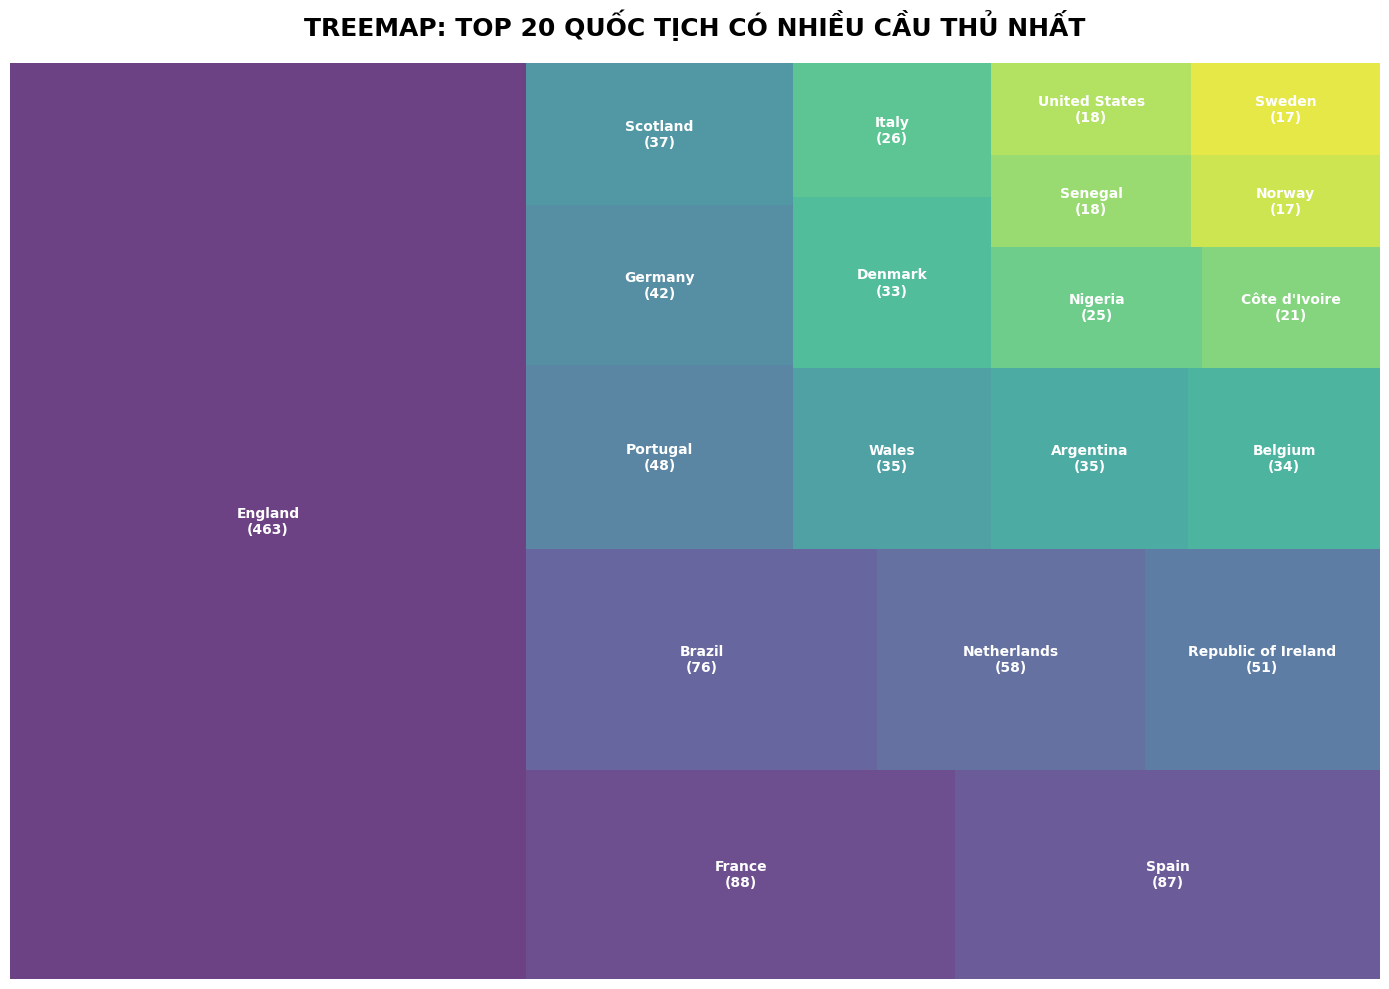

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # Thư viện để vẽ TreeMap

# 1. Đọc dữ liệu từ file Excel
file_path = r"E:\project 1\data_clean\player_info.xlsx"

try:
    # Đọc file Excel
    df = pd.read_excel(file_path)

    # 2. Xử lý dữ liệu
    nationality_counts = df['National Team'].value_counts().reset_index()
    nationality_counts.columns = ['Country', 'Player Count']

    # Lấy Top 20-30 quốc gia để TreeMap trông đẹp và không quá rối
    top_n = 20
    top_nationalities = nationality_counts.head(top_n)

    # 3. Vẽ biểu đồ TreeMap
    plt.figure(figsize=(14, 10))

    # Tạo màu sắc dựa trên bảng màu của Seaborn
    colors = sns.color_palette('viridis', n_colors=top_n)

    # Tạo nhãn cho từng ô (Tên quốc gia + Số lượng)
    labels = [f"{row['Country']}\n({row['Player Count']})" for index, row in top_nationalities.iterrows()]

    # Vẽ TreeMap bằng squarify
    squarify.plot(
        sizes=top_nationalities['Player Count'], 
        label=labels, 
        color=colors, 
        alpha=0.8, 
        text_kwargs={'fontsize': 10, 'fontweight': 'bold', 'color': 'white'}
    )

    # Định dạng tiêu đề
    plt.title(f'TREEMAP: TOP {top_n} QUỐC TỊCH CÓ NHIỀU CẦU THỦ NHẤT', fontsize=18, fontweight='bold', pad=20)
    
    # Loại bỏ trục tọa độ
    plt.axis('off')

    # Tự động điều chỉnh bố cục
    plt.tight_layout()
    
    # Hiển thị biểu đồ
    plt.show()

except Exception as e:
    print(f"Lỗi khi xử lý file: {e}")

Phân bố câu lạc bộ

C:\Users\HP\AppData\Local\Temp\ipykernel_17264\519905589.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


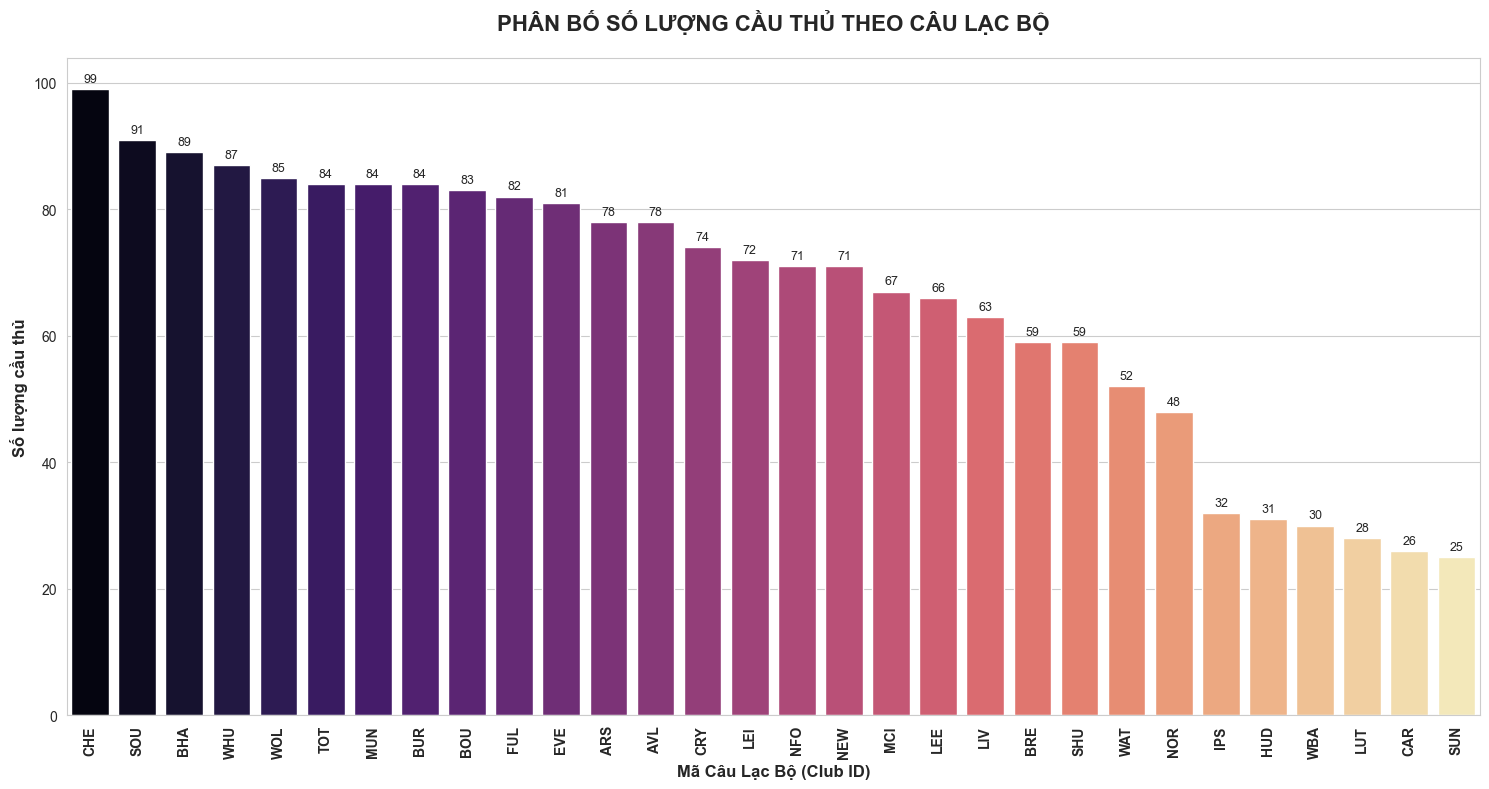

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đọc dữ liệu từ file Excel
file_path = r"E:\project 1\data_clean\Club_player.xlsx"

try:
    # Đọc file Excel
    df = pd.read_excel(file_path)

    # 2. Đếm số lượng cầu thủ theo Club_ID
    club_counts = df['Club_ID'].value_counts().reset_index()
    club_counts.columns = ['Club_ID', 'Player_Count']

    # Sắp xếp theo số lượng cầu thủ giảm dần để biểu đồ đẹp hơn
    club_counts = club_counts.sort_values(by='Player_Count', ascending=False)

    # 3. Vẽ biểu đồ
    plt.figure(figsize=(15, 8))
    sns.set_style("whitegrid")

    # Vẽ biểu đồ cột
    ax = sns.barplot(
        x='Club_ID', 
        y='Player_Count', 
        data=club_counts, 
        palette='magma'
    )

    # 4. Cấu hình trục X: Xoay tên CLB dọc 90 độ
    plt.xticks(rotation=90, fontsize=10, fontweight='bold')

    # Thêm số lượng trên đầu mỗi cột
    for i in ax.containers:
        ax.bar_label(i, padding=3, fontsize=9)

    # Định dạng tiêu đề và nhãn
    plt.title('PHÂN BỐ SỐ LƯỢNG CẦU THỦ THEO CÂU LẠC BỘ', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Mã Câu Lạc Bộ (Club ID)', fontsize=12, fontweight='bold')
    plt.ylabel('Số lượng cầu thủ', fontsize=12, fontweight='bold')

    # Tự động điều chỉnh để không mất chữ phía dưới
    plt.tight_layout()
    
    # Hiển thị biểu đồ
    plt.show()

except Exception as e:
    print(f"Lỗi: {e}")

vị trí thi đấu 

C:\Users\HP\AppData\Local\Temp\ipykernel_17264\1706205255.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Count', data=pos_counts, ax=ax1, palette='viridis')


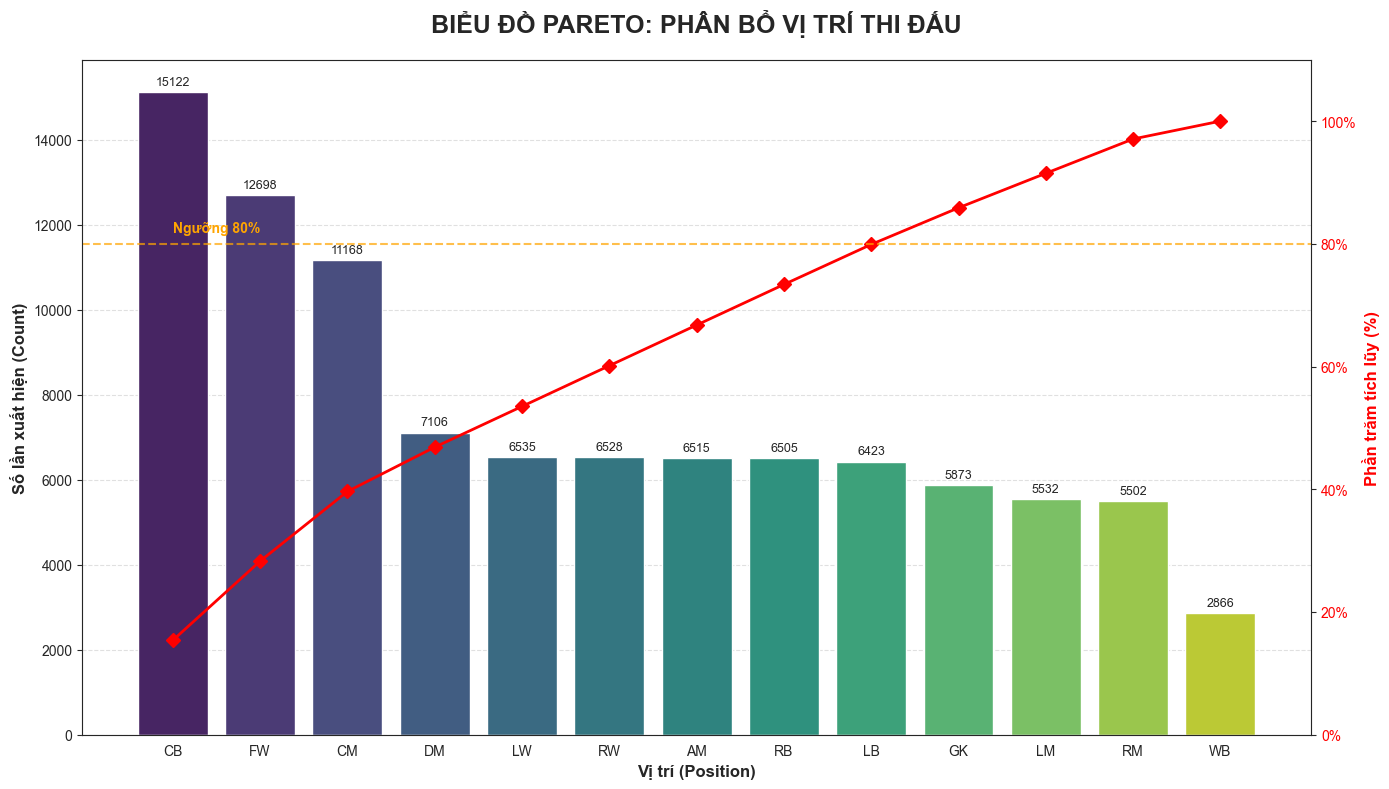

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# 1. Đọc dữ liệu
file_path = r"E:\project 1\data_18_25\matchlog\players_standard_matchlogs.csv"

try:
    # Đọc file CSV
    df = pd.read_csv(file_path, low_memory=False)

    # 2. Xử lý cột "Pos"
    pos_series = df['Pos'].dropna()
    all_positions = pos_series.str.split(',').explode().str.strip()

    # 3. Chuẩn bị dữ liệu cho Pareto
    pos_counts = all_positions.value_counts().reset_index()
    pos_counts.columns = ['Position', 'Count']

    # Tính phần trăm tích lũy
    pos_counts['cum_percentage'] = 100 * pos_counts['Count'].cumsum() / pos_counts['Count'].sum()

    # 4. Vẽ biểu đồ Pareto
    fig, ax1 = plt.subplots(figsize=(14, 8))
    sns.set_style("white")

    # --- Vẽ cột (Trục bên trái) ---
    sns.barplot(x='Position', y='Count', data=pos_counts, ax=ax1, palette='viridis')
    ax1.set_ylabel('Số lần xuất hiện (Count)', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Vị trí (Position)', fontsize=12, fontweight='bold')

    # Thêm số lượng trên đầu mỗi cột
    for i in ax1.containers:
        ax1.bar_label(i, padding=3, fontsize=9)

    # --- Vẽ đường tích lũy (Trục bên phải) ---
    ax2 = ax1.twinx()
    ax2.plot(pos_counts['Position'], pos_counts['cum_percentage'], color='red', marker='D', ms=7, linewidth=2, label='Phần trăm tích lũy')
    
    # Định dạng trục phải thành %
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.set_ylabel('Phần trăm tích lũy (%)', fontsize=12, fontweight='bold', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 110) # Để đường biểu diễn không bị chạm mép trên

    # --- Kẻ đường 80% để xác định nhóm quan trọng nhất ---
    ax2.axhline(80, color='orange', linestyle='--', alpha=0.7)
    ax2.text(0, 82, 'Ngưỡng 80%', color='orange', fontweight='bold')

    # Định dạng tiêu đề
    plt.title('BIỂU ĐỒ PARETO: PHÂN BỔ VỊ TRÍ THI ĐẤU', fontsize=18, fontweight='bold', pad=20)
    
    ax1.grid(axis='y', linestyle='--', alpha=0.6)
    fig.tight_layout()
    plt.show()

except Exception as e:
    print(f"Lỗi khi xử lý dữ liệu: {e}")

THời gian thi đấu 

C:\Users\HP\AppData\Local\Temp\ipykernel_17264\3860780645.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Range', y='Count', data=range_counts, palette='coolwarm')


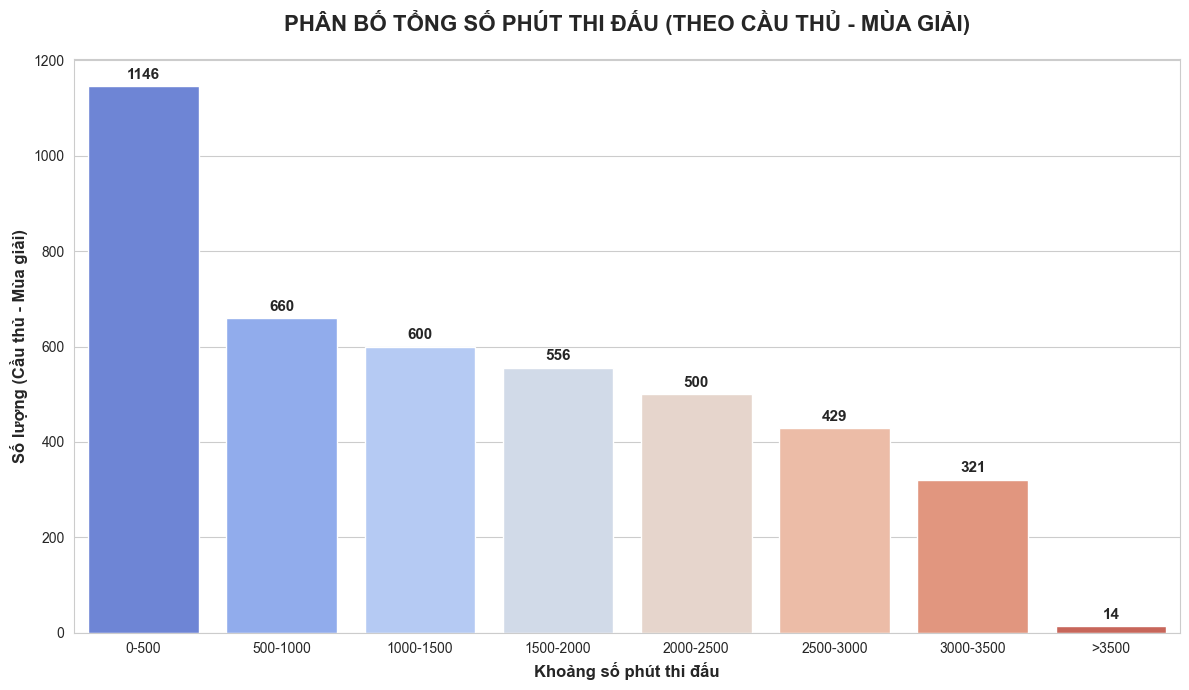

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đọc dữ liệu
file_path = r"E:\project 1\data_18_25\matchlog\players_standard_matchlogs.csv"

try:
    # Đọc file CSV
    df = pd.read_csv(file_path, low_memory=False)

    # Chuyển cột Min sang kiểu số (loại bỏ lỗi nếu có dữ liệu rác)
    df['Min'] = pd.to_numeric(df['Min'], errors='coerce').fillna(0)

    # 2. Tính tổng số phút theo từng Cầu thủ và từng Mùa giải
    # Giả định cột tên cầu thủ là 'Player' và mùa giải là 'Season'
    player_season_mins = df.groupby(['Player', 'Season'])['Min'].sum().reset_index()

    # 3. Chia khoảng (Binning)
    # Định nghĩa các mốc: 0, 500, 1000, ..., 3500, và một mốc cuối cực lớn (ví dụ 5000) để tránh sót
    bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 5000]
    labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '>3500']

    player_season_mins['Min_Range'] = pd.cut(player_season_mins['Min'], bins=bins, labels=labels, right=False)

    # 4. Đếm số lượng cầu thủ trong mỗi khoảng
    range_counts = player_season_mins['Min_Range'].value_counts().reindex(labels).reset_index()
    range_counts.columns = ['Range', 'Count']

    # 5. Vẽ biểu đồ
    plt.figure(figsize=(12, 7))
    sns.set_style("whitegrid")

    # Vẽ biểu đồ cột
    ax = sns.barplot(x='Range', y='Count', data=range_counts, palette='coolwarm')

    # Thêm số lượng trên đầu cột
    for i in ax.containers:
        ax.bar_label(i, padding=3, fontsize=11, fontweight='bold')

    # Định dạng tiêu đề và nhãn
    plt.title('PHÂN BỐ TỔNG SỐ PHÚT THI ĐẤU (THEO CẦU THỦ - MÙA GIẢI)', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Khoảng số phút thi đấu', fontsize=12, fontweight='bold')
    plt.ylabel('Số lượng (Cầu thủ - Mùa giải)', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Lỗi: {e}")

Đặc trưng

In [12]:
import pandas as pd
import numpy as np
from scipy import stats

# 1. Cấu hình hiển thị của Pandas: Không dùng số mũ, lấy 3 chữ số thập phân
pd.options.display.float_format = '{:.3f}'.format

# 2. Đọc dữ liệu
file_path = r"E:\project 1\data_18_25\matchlog\players_standard_matchlogs.csv"

try:
    df = pd.read_csv(file_path, low_memory=False)

    # 3. Tiền xử lý và Lọc dữ liệu Min > 30
    cols_to_analyze = ['Min', 'Touches', 'Cmp%']
    for col in cols_to_analyze:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df_filtered = df[df['Min'] > 30].copy()

    # 4. Hàm tính toán bộ chỉ số thống kê chi tiết
    def get_full_stats(data):
        data = data.dropna()
        n = len(data)
        mean = data.mean()
        std_dev = data.std()
        std_err = data.sem()
        
        # Tính Confidence Level (95%)
        confidence_level = stats.t.ppf(1 - 0.05/2, n - 1) * std_err

        stats_dict = {
            "Mean": mean,
            "Standard Error": std_err,
            "Median": data.median(),
            "Mode": data.mode().iloc[0] if not data.mode().empty else np.nan,
            "Standard Deviation": std_dev,
            "Sample Variance": data.var(),
            "Kurtosis": data.kurtosis(),
            "Skewness": data.skew(),
            "Range": data.max() - data.min(),
            "Minimum": data.min(),
            "Maximum": data.max(),
            "Sum": data.sum(),
            "Count": float(n), # Để đồng nhất kiểu dữ liệu số thực
            "Confidence Level(95.0%)": confidence_level
        }
        return pd.Series(stats_dict)

    # 5. Áp dụng tính toán
    final_report = pd.DataFrame()
    for col in cols_to_analyze:
        final_report[col] = get_full_stats(df_filtered[col])

    # 6. Hiển thị kết quả
    print("--- BẢNG THỐNG KÊ CHI TIẾT (SỐ CỤ THỂ) ---")
    # Sử dụng thêm định dạng có dấu phẩy ngăn cách hàng nghìn cho dễ đọc
    print(final_report.applymap(lambda x: "{:,.3f}".format(x)))

except Exception as e:
    print(f"Lỗi: {e}")

--- BẢNG THỐNG KÊ CHI TIẾT (SỐ CỤ THỂ) ---
                                   Min        Touches           Cmp%
Mean                            81.897         50.391         76.593
Standard Error                   0.056          0.088          0.049
Median                          90.000         47.000         78.400
Mode                            90.000         39.000         75.000
Standard Deviation              14.678         22.996         12.742
Sample Variance                215.439        528.821        162.363
Kurtosis                         2.564          0.750          1.153
Skewness                        -1.880          0.819         -0.891
Range                           59.000        191.000        100.000
Minimum                         31.000          2.000          0.000
Maximum                         90.000        193.000        100.000
Sum                      5,573,832.000  3,426,522.000  5,208,003.500
Count                       68,059.000     67,999.000     67

C:\Users\HP\AppData\Local\Temp\ipykernel_17264\2793119587.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(final_report.applymap(lambda x: "{:,.3f}".format(x)))


In [13]:
import pandas as pd
import numpy as np
from scipy import stats

# 1. Cấu hình hiển thị: Không dùng số mũ, lấy 3 chữ số thập phân
pd.options.display.float_format = '{:.3f}'.format

# 2. Đọc dữ liệu từ file Excel
file_path = r"E:\project 1\data_clean\player_info.xlsx"

try:
    # Đọc file Excel (cần thư viện openpyxl)
    df = pd.read_excel(file_path)

    # 3. Tiền xử lý: Ép kiểu về số cho 2 cột Chiều cao và Cân nặng
    cols_to_analyze = ['Height (cm)', 'Weight (kg)']
    for col in cols_to_analyze:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # 4. Hàm tính toán bộ chỉ số thống kê chi tiết
    def get_full_stats(data):
        # Loại bỏ giá trị trống (NaN) để tính toán chính xác
        data = data.dropna()
        
        n = len(data)
        if n == 0: return pd.Series([np.nan]*14) # Tránh lỗi nếu cột trống
        
        mean = data.mean()
        std_dev = data.std()
        std_err = data.sem()
        
        # Tính Confidence Level (95%) dựa trên phân phối t
        confidence_level = stats.t.ppf(1 - 0.05/2, n - 1) * std_err

        stats_dict = {
            "Mean": mean,
            "Standard Error": std_err,
            "Median": data.median(),
            "Mode": data.mode().iloc[0] if not data.mode().empty else np.nan,
            "Standard Deviation": std_dev,
            "Sample Variance": data.var(),
            "Kurtosis": data.kurtosis(),
            "Skewness": data.skew(),
            "Range": data.max() - data.min(),
            "Minimum": data.min(),
            "Maximum": data.max(),
            "Sum": data.sum(),
            "Count": float(n),
            "Confidence Level(95.0%)": confidence_level
        }
        return pd.Series(stats_dict)

    # 5. Áp dụng tính toán cho 2 cột
    final_report = pd.DataFrame()
    for col in cols_to_analyze:
        final_report[col] = get_full_stats(df[col])

    # 6. Hiển thị kết quả với định dạng số cụ thể, có dấu phẩy ngăn cách hàng nghìn
    print("--- BẢNG THỐNG KÊ CHI TIẾT: CHIỀU CAO & CÂN NẶNG ---")
    print(final_report.applymap(lambda x: "{:,.3f}".format(x) if pd.notnull(x) else "N/A"))

    # (Tùy chọn) Lưu kết quả ra Excel để đưa vào báo cáo
    # final_report.to_excel("thong_ke_the_hinh_cau_thu.xlsx")

except Exception as e:
    print(f"Lỗi: {e}")

--- BẢNG THỐNG KÊ CHI TIẾT: CHIỀU CAO & CÂN NẶNG ---
                         Height (cm)  Weight (kg)
Mean                         181.983       74.082
Standard Error                 0.183        0.192
Median                       182.000       73.000
Mode                         180.000       69.000
Standard Deviation             6.969        7.141
Sample Variance               48.560       50.993
Kurtosis                      -0.554        0.129
Skewness                       0.077        0.278
Range                         39.000       59.000
Minimum                      163.000       52.000
Maximum                      202.000      111.000
Sum                      263,148.000  102,381.000
Count                      1,446.000    1,382.000
Confidence Level(95.0%)        0.359        0.377


C:\Users\HP\AppData\Local\Temp\ipykernel_17264\2997997962.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(final_report.applymap(lambda x: "{:,.3f}".format(x) if pd.notnull(x) else "N/A"))


Tương quan 

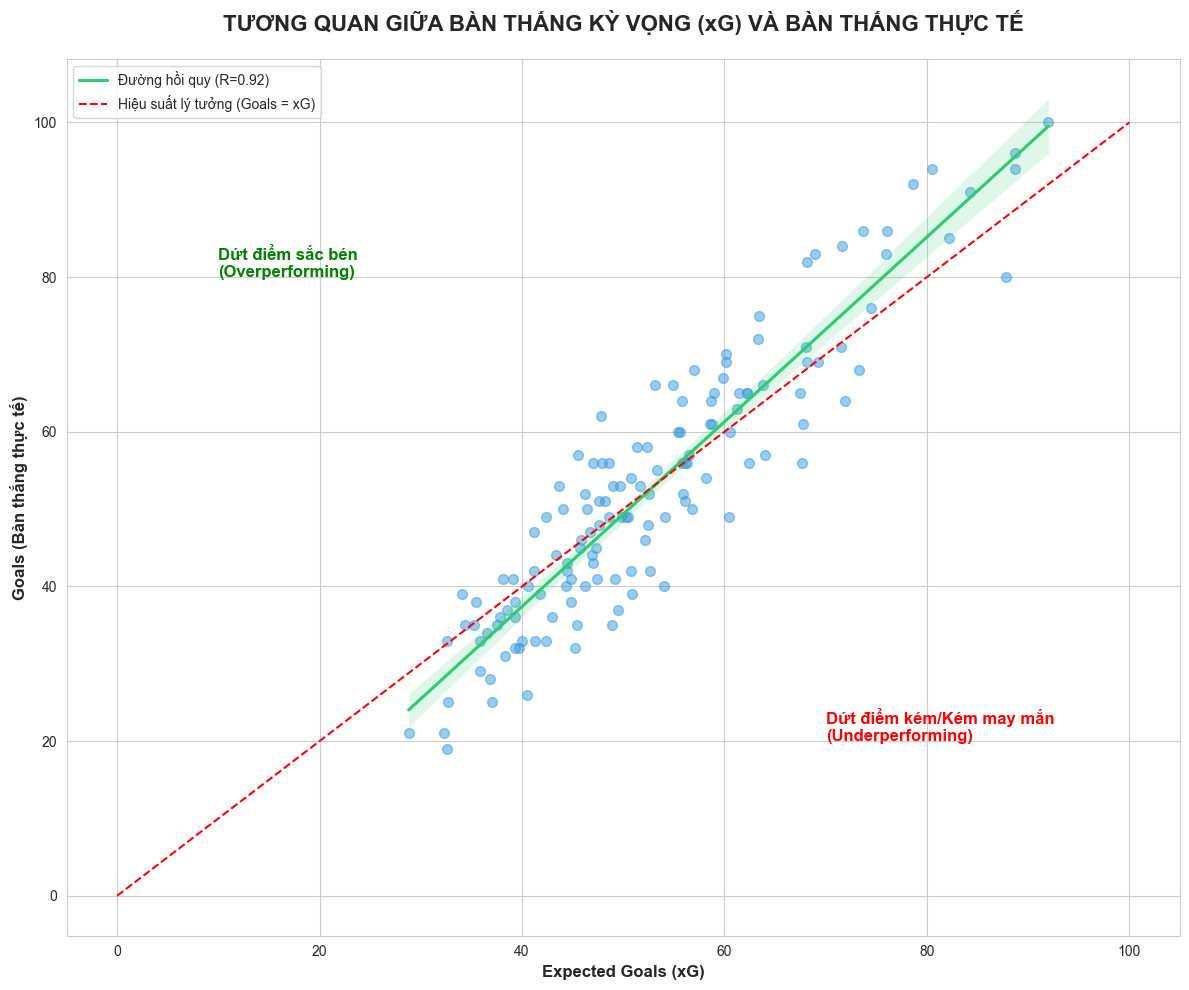

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Đọc dữ liệu
file_path = r"E:\project 1\data_18_25\squad\squad_standard_stats_2018-2025.csv"

try:
    df = pd.read_csv(file_path)

    # 2. Tiền xử lý: Đảm bảo dữ liệu là số và loại bỏ giá trị thiếu
    cols = ['Expected_Goals', 'Goals']
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df_clean = df.dropna(subset=cols)

    # 3. Tính hệ số tương quan Pearson để đưa vào biểu đồ
    correlation = df_clean['Expected_Goals'].corr(df_clean['Goals'])

    # 4. Vẽ biểu đồ
    plt.figure(figsize=(12, 10))
    sns.set_style("whitegrid")

    # Vẽ các điểm dữ liệu và đường hồi quy (màu xanh)
    sns.regplot(x='Expected_Goals', y='Goals', data=df_clean, 
                scatter_kws={'alpha':0.5, 's':50, 'color':'#3498db'}, 
                line_kws={'color':'#2ecc71', 'label': f'Đường hồi quy (R={correlation:.2f})'})

    # Vẽ đường chéo y = x (màu đỏ đứt đoạn) để so sánh
    max_val = max(df_clean['Expected_Goals'].max(), df_clean['Goals'].max())
    plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Hiệu suất lý tưởng (Goals = xG)')

    # 5. Định dạng biểu đồ
    plt.title('TƯƠNG QUAN GIỮA BÀN THẮNG KỲ VỌNG (xG) VÀ BÀN THẮNG THỰC TẾ', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Expected Goals (xG)', fontsize=12, fontweight='bold')
    plt.ylabel('Goals (Bàn thắng thực tế)', fontsize=12, fontweight='bold')
    
    # Thêm chú thích cho các khu vực
    plt.text(max_val*0.1, max_val*0.8, 'Dứt điểm sắc bén\n(Overperforming)', color='green', fontsize=12, fontweight='bold')
    plt.text(max_val*0.7, max_val*0.2, 'Dứt điểm kém/Kém may mắn\n(Underperforming)', color='red', fontsize=12, fontweight='bold')

    plt.legend()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Lỗi: {e}")

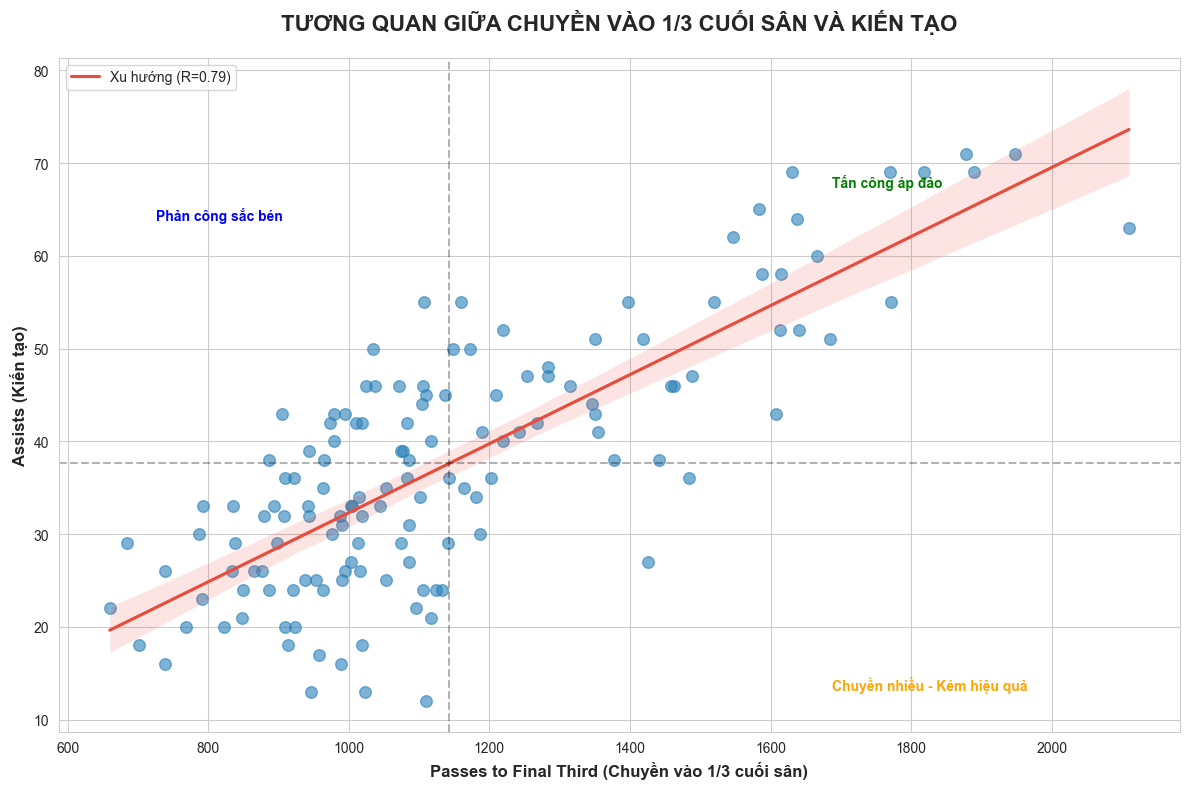

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đọc dữ liệu
file_path = r"E:\project 1\data_18_25\squad\squad_passing_stats_2018-2025.csv"

try:
    df = pd.read_csv(file_path)

    # 2. Tiền xử lý dữ liệu
    # Đảm bảo tên cột khớp với yêu cầu (Assists và Pass_to_Final_Third)
    col_x = 'Pass_to_Final_Third'
    col_y = 'Assists'
    
    for col in [col_x, col_y]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df_clean = df.dropna(subset=[col_x, col_y])

    # 3. Tính hệ số tương quan Pearson
    correlation = df_clean[col_x].corr(df_clean[col_y])

    # 4. Vẽ biểu đồ
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Vẽ Scatter plot và đường hồi quy (màu xanh dương đậm)
    sns.regplot(x=col_x, y=col_y, data=df_clean, 
                scatter_kws={'alpha':0.6, 's':70, 'color':'#2980b9'}, 
                line_kws={'color':'#e74c3c', 'label': f'Xu hướng (R={correlation:.2f})'})

    # 5. Thêm các đường trung bình để chia vùng (Quadrants)
    mean_x = df_clean[col_x].mean()
    mean_y = df_clean[col_y].mean()
    plt.axvline(mean_x, color='black', linestyle='--', alpha=0.3)
    plt.axhline(mean_y, color='black', linestyle='--', alpha=0.3)

    # 6. Định dạng và chú thích
    plt.title('TƯƠNG QUAN GIỮA CHUYỀN VÀO 1/3 CUỐI SÂN VÀ KIẾN TẠO', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Passes to Final Third (Chuyền vào 1/3 cuối sân)', fontsize=12, fontweight='bold')
    plt.ylabel('Assists (Kiến tạo)', fontsize=12, fontweight='bold')

    # Chú thích các vùng
    plt.text(df_clean[col_x].max()*0.8, df_clean[col_y].max()*0.95, 'Tấn công áp đảo', color='green', fontweight='bold')
    plt.text(df_clean[col_x].max()*0.8, df_clean[col_y].min()*1.1, 'Chuyền nhiều - Kém hiệu quả', color='orange', fontweight='bold')
    plt.text(df_clean[col_x].min()*1.1, df_clean[col_y].max()*0.9, 'Phản công sắc bén', color='blue', fontweight='bold')

    plt.legend()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Lỗi: {e}. Vui lòng kiểm tra lại tên cột trong file CSV.")

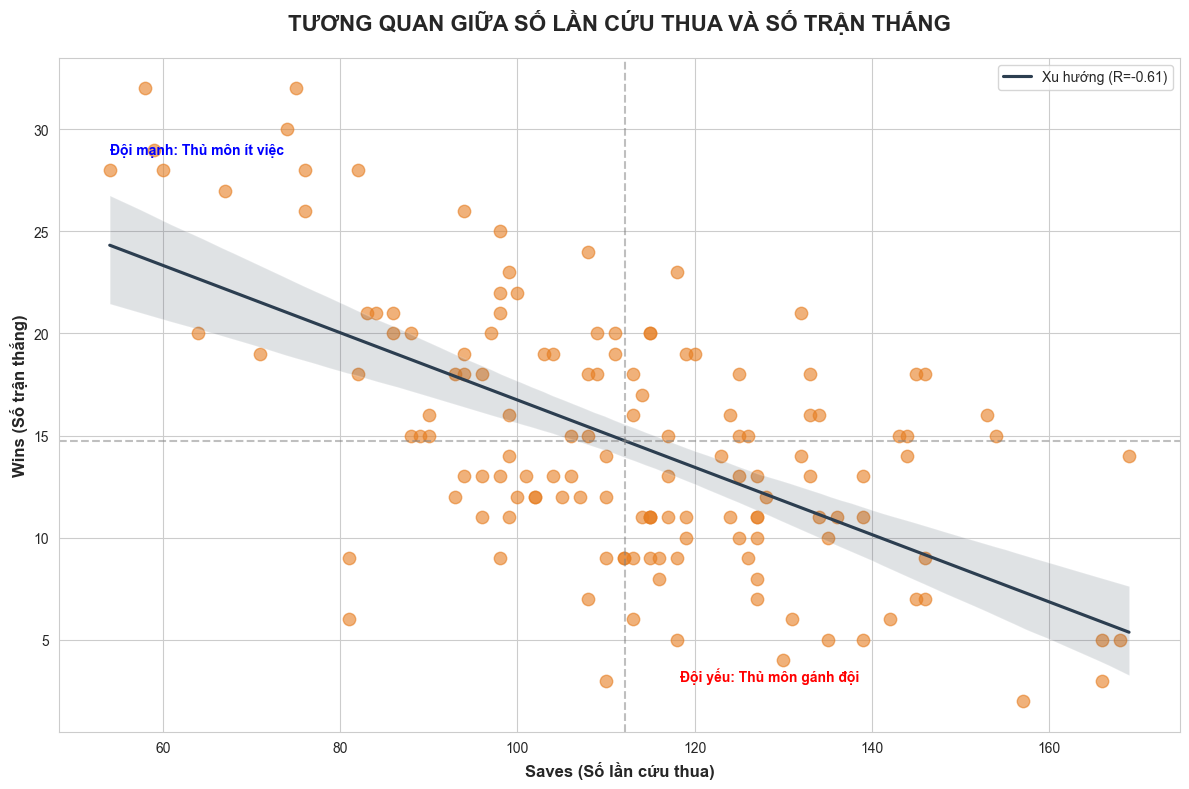

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đọc dữ liệu
file_path = r"E:\project 1\data_18_25\squad\squad_goalkeeping_stats_2018-2025.csv"

try:
    df = pd.read_csv(file_path)

    # 2. Tiền xử lý dữ liệu
    # Lưu ý: Trong dữ liệu bóng đá, cột thắng thường là 'W' hoặc 'Wins'
    # Tôi sẽ kiểm tra và gán lại cho đúng yêu cầu của bạn
    col_x = 'Saves'
    col_y = 'Wins' if 'Wins' in df.columns else 'W'
    
    if col_y not in df.columns:
        print(f"Cảnh báo: Không tìm thấy cột thắng. Các cột hiện có: {df.columns}")
    
    for col in [col_x, col_y]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    df_clean = df.dropna(subset=[col_x, col_y])

    # 3. Tính hệ số tương quan Pearson
    correlation = df_clean[col_x].corr(df_clean[col_y])

    # 4. Vẽ biểu đồ
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Vẽ Scatter plot và đường hồi quy (màu cam)
    sns.regplot(x=col_x, y=col_y, data=df_clean, 
                scatter_kws={'alpha':0.6, 's':80, 'color':'#e67e22'}, 
                line_kws={'color':'#2c3e50', 'label': f'Xu hướng (R={correlation:.2f})'})

    # 5. Thêm đường trung bình để phân vùng
    plt.axvline(df_clean[col_x].mean(), color='gray', linestyle='--', alpha=0.5)
    plt.axhline(df_clean[col_y].mean(), color='gray', linestyle='--', alpha=0.5)

    # 6. Định dạng và chú thích
    plt.title('TƯƠNG QUAN GIỮA SỐ LẦN CỨU THUA VÀ SỐ TRẬN THẮNG', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Saves (Số lần cứu thua)', fontsize=12, fontweight='bold')
    plt.ylabel('Wins (Số trận thắng)', fontsize=12, fontweight='bold')

    # Chú thích các vùng đặc trưng
    plt.text(df_clean[col_x].min(), df_clean[col_y].max()*0.9, 'Đội mạnh: Thủ môn ít việc', color='blue', fontweight='bold')
    plt.text(df_clean[col_x].max()*0.7, df_clean[col_y].min()*1.5, 'Đội yếu: Thủ môn gánh đội', color='red', fontweight='bold')

    plt.legend()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Lỗi: {e}")

khuynh mùa

--- Phân tích hiệu suất đội bóng: Arsenal ---

Chỉ số trung bình của đội mỗi trận:
        Gls   Ast    xG   xAG    SCA   PrgP   PrgC
Venue                                             
Away   1.59  1.17  1.51  1.06  22.72  47.11  20.50
Home   2.10  1.60  1.89  1.34  29.00  53.88  23.95


C:\Users\HP\AppData\Local\Temp\ipykernel_22960\2050544632.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=squad_df, x='Venue', y='xG', palette='viridis', ci=None)
C:\Users\HP\AppData\Local\Temp\ipykernel_22960\2050544632.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=squad_df, x='Venue', y='xG', palette='viridis', ci=None)
C:\Users\HP\AppData\Local\Temp\ipykernel_22960\2050544632.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=squad_df, x='Venue', y='SCA', palette='Set2')


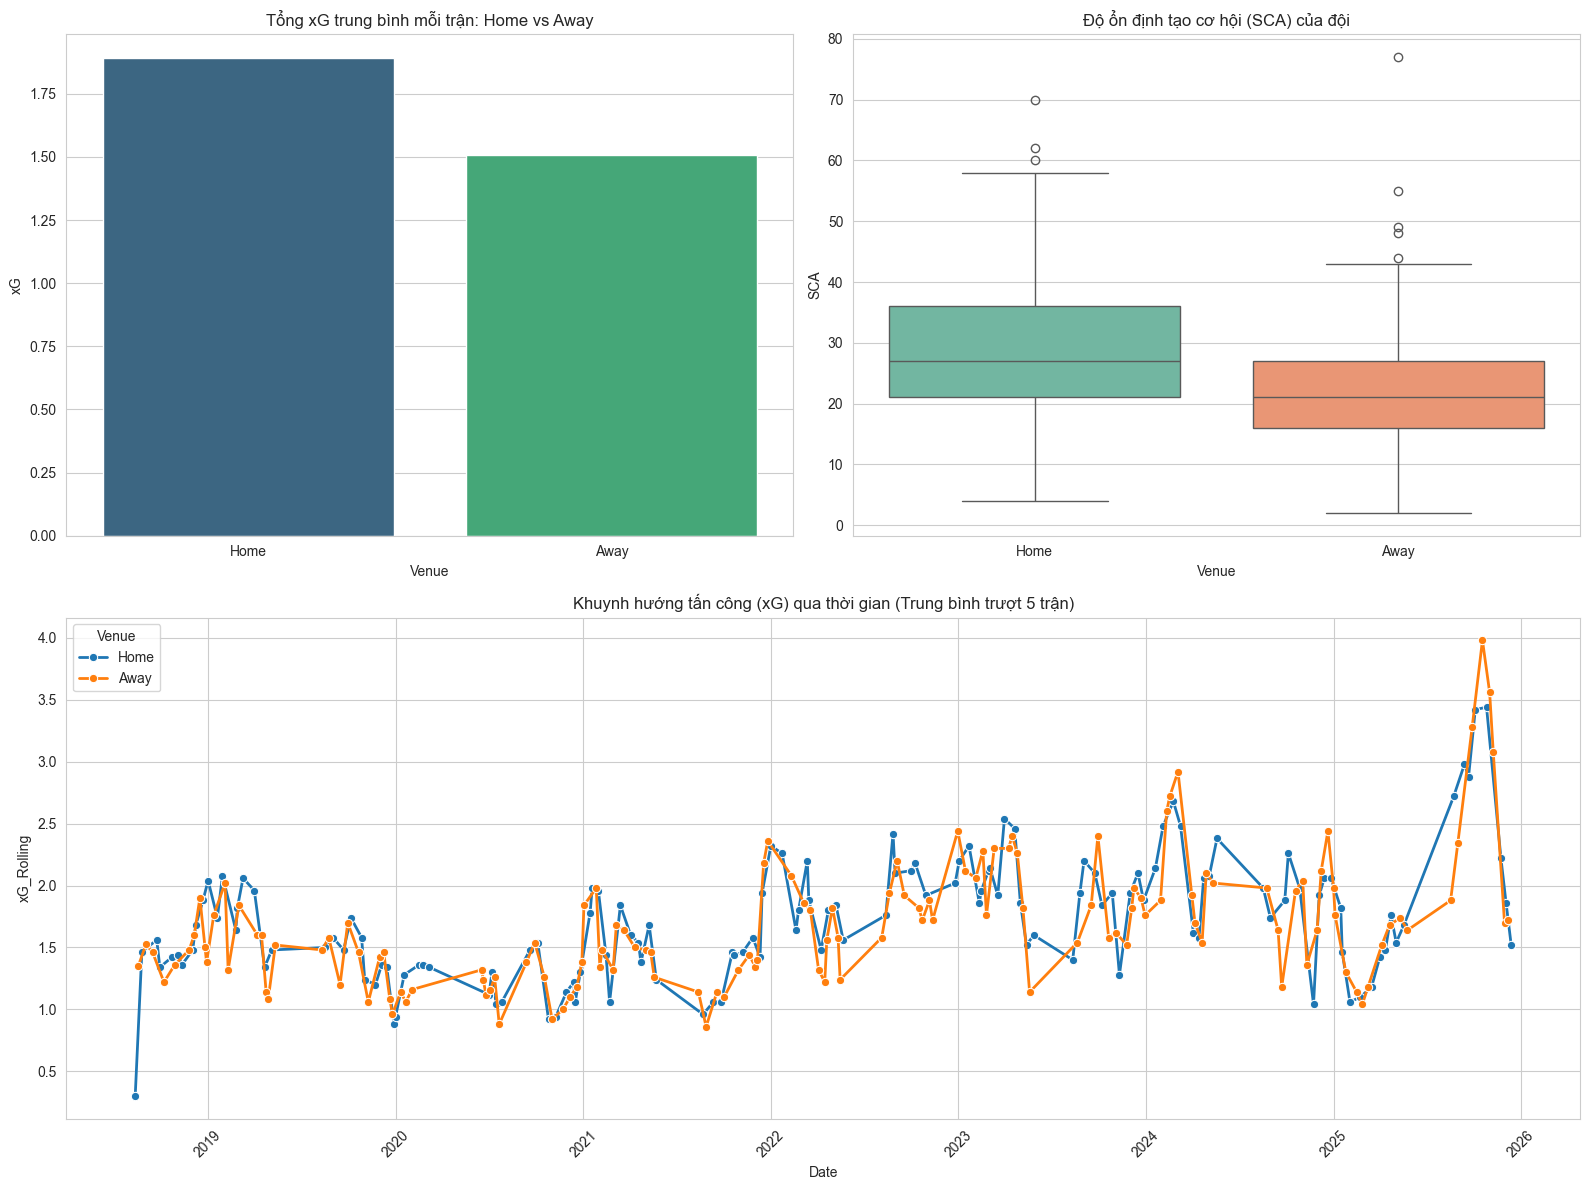


Thống kê kết quả trận đấu:
Result  D 0–0  D 1–1  D 2–2  D 3–3  L 0–1  L 0–2  L 0–3  L 0–4  L 0–5  L 1–2  \
Venue                                                                          
Away        6     14     11      1     13      5      4      1      1      7   
Home        5     12      9      1      5      5      4      0      0      6   

Result  ...  W 3–1  W 3–2  W 4–0  W 4–1  W 4–2  W 4–3  W 5–0  W 5–1  W 5–2  \
Venue   ...                                                                  
Away    ...      6      3      3      1      3      1      2      2      1   
Home    ...     15      6      3      5      4      0      6      3      0   

Result  W 6–0  
Venue          
Away        2  
Home        0  

[2 rows x 28 columns]


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cấu hình đường dẫn và đọc dữ liệu
file_path = r"E:\project 1\data_18_25\matchlog\players_standard_matchlogs.csv"

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except:
    df = pd.read_csv(file_path, encoding='latin1')

# 2. Tiền xử lý
df['Date'] = pd.to_datetime(df['Date'])
cols_to_fix = ['Gls', 'Ast', 'xG', 'xAG', 'SCA', 'PrgP', 'PrgC']
df[cols_to_fix] = df[cols_to_fix].fillna(0)

# --- BƯỚC QUAN TRỌNG: CHUYỂN TỪ DỮ LIỆU CẦU THỦ SANG DỮ LIỆU ĐỘI BÓNG ---
# Gom tất cả cầu thủ trong cùng một trận (cùng Squad, cùng Date, cùng Opponent)
team_match_logs = df.groupby(['Squad', 'Date', 'Venue', 'Opponent', 'Result'])[cols_to_fix].sum().reset_index()
team_match_logs = team_match_logs.sort_values('Date')

# 3. Chọn Câu lạc bộ muốn phân tích
# Bạn có thể thay tên CLB ở đây (ví dụ: 'Manchester City', 'Liverpool', 'Arsenal'...)
squad_name = 'Arsenal'
squad_df = team_match_logs[team_match_logs['Squad'] == squad_name].copy()

print(f"--- Phân tích hiệu suất đội bóng: {squad_name} ---")

# 4. So sánh Đặc trưng (Trung bình Home vs Away của cả đội)
venue_stats = squad_df.groupby('Venue')[cols_to_fix].mean()
print("\nChỉ số trung bình của đội mỗi trận:")
print(venue_stats.round(2))

# 5. Trực quan hóa
plt.figure(figsize=(16, 12))

# Biểu đồ 1: So sánh xG (Bàn thắng kỳ vọng) của đội
plt.subplot(2, 2, 1)
sns.barplot(data=squad_df, x='Venue', y='xG', palette='viridis', ci=None)
plt.title(f'Tổng xG trung bình mỗi trận: Home vs Away')

# Biểu đồ 2: Phân bố SCA (Khả năng tạo cơ hội của cả đội)
# Giúp xem đội đá sân khách có bị "ngợp" và mất thế trận không
plt.subplot(2, 2, 2)
sns.boxplot(data=squad_df, x='Venue', y='SCA', palette='Set2')
plt.title(f'Độ ổn định tạo cơ hội (SCA) của đội')

# Biểu đồ 3: Khuynh hướng phong độ đội bóng (Rolling Average 5 trận)
plt.subplot(2, 1, 2)
# Tính trung bình trượt 5 trận để thấy chu kỳ phong độ
squad_df['xG_Rolling'] = squad_df['xG'].rolling(window=5, min_periods=1).mean()
sns.lineplot(data=squad_df, x='Date', y='xG_Rolling', hue='Venue', marker='o', linewidth=2)
plt.title(f'Khuynh hướng tấn công (xG) qua thời gian (Trung bình trượt 5 trận)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 6. Thống kê kết quả Thắng/Hòa/Thua trên các sân
result_counts = squad_df.groupby(['Venue', 'Result']).size().unstack(fill_value=0)
print("\nThống kê kết quả trận đấu:")
print(result_counts)

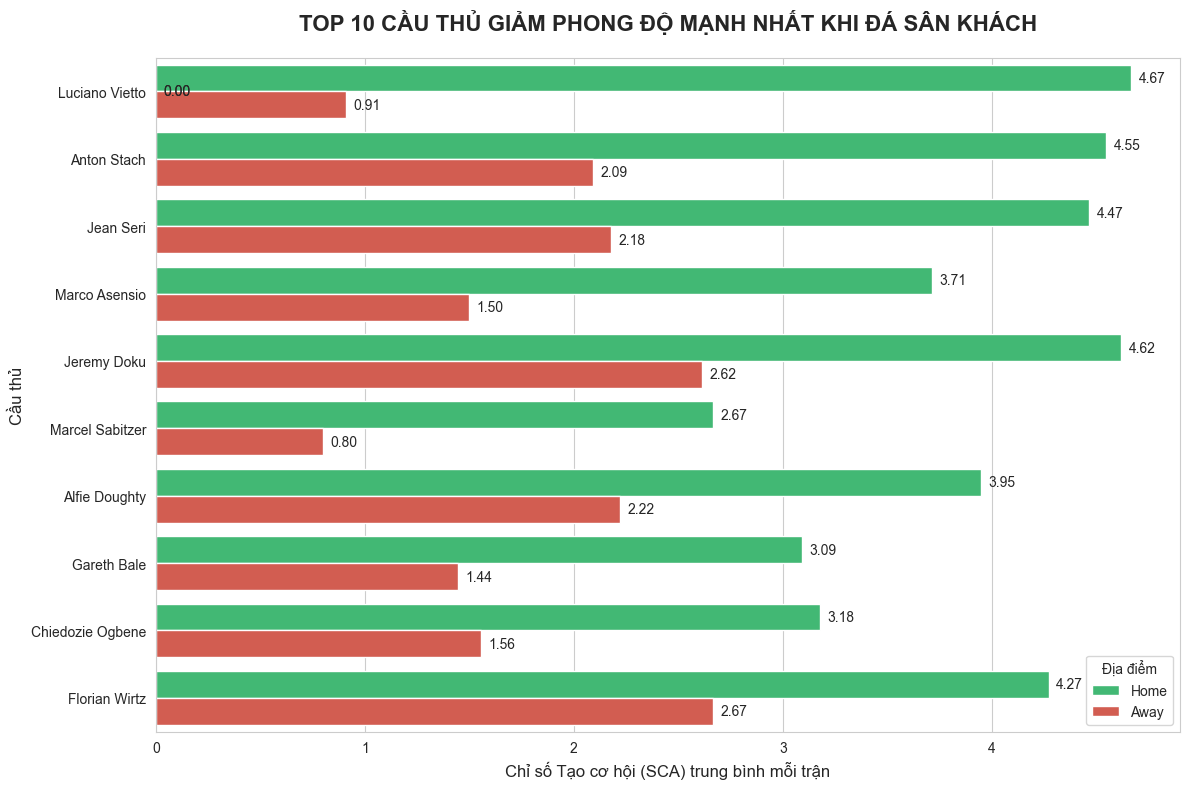

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Đọc và xử lý dữ liệu (giống bước trước)
file_path = r"E:\project 1\data_18_25\matchlog\players_standard_matchlogs.csv"
try:
    df = pd.read_csv(file_path, encoding='utf-8')
except:
    df = pd.read_csv(file_path, encoding='latin1')

# Điền giá trị thiếu và lọc cầu thủ đá trên 5 trận mỗi loại sân
df['SCA'] = df['SCA'].fillna(0)
player_counts = df.groupby(['Player', 'Venue']).size().unstack(fill_value=0)
qualified_players = player_counts[(player_counts['Home'] >= 5) & (player_counts['Away'] >= 5)].index
df_filtered = df[df['Player'].isin(qualified_players)]

# 2. Tính toán trung bình SCA
comparison = df_filtered.groupby(['Player', 'Venue'])['SCA'].mean().unstack()
comparison['SCA_Drop'] = comparison['Home'] - comparison['Away']

# Lấy Top 10 cầu thủ có mức giảm mạnh nhất
top_10_drop = comparison.sort_values(by='SCA_Drop', ascending=False).head(10)

# 3. Chuyển đổi dữ liệu sang dạng "Long-form" để vẽ biểu đồ bằng Seaborn
# Từ dạng cột Home | Away sang dạng một cột Venue và một cột Giá trị
plot_data = top_10_drop[['Home', 'Away']].reset_index().melt(id_vars='Player', var_name='Sân', value_name='Chỉ số SCA')

# 4. Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Vẽ biểu đồ cột ngang (ngang giúp đọc tên cầu thủ dễ hơn)
ax = sns.barplot(data=plot_data, y='Player', x='Chỉ số SCA', hue='Sân', palette={'Home': '#2ecc71', 'Away': '#e74c3c'})

# Thêm các chi tiết cho biểu đồ
plt.title('TOP 10 CẦU THỦ GIẢM PHONG ĐỘ MẠNH NHẤT KHI ĐÁ SÂN KHÁCH', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Chỉ số Tạo cơ hội (SCA) trung bình mỗi trận', fontsize=12)
plt.ylabel('Cầu thủ', fontsize=12)
plt.legend(title='Địa điểm', loc='lower right')

# Thêm con số cụ thể vào đầu mỗi cột để dễ theo dõi
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.1, p.get_y() + p.get_height()/2, f'{width:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()

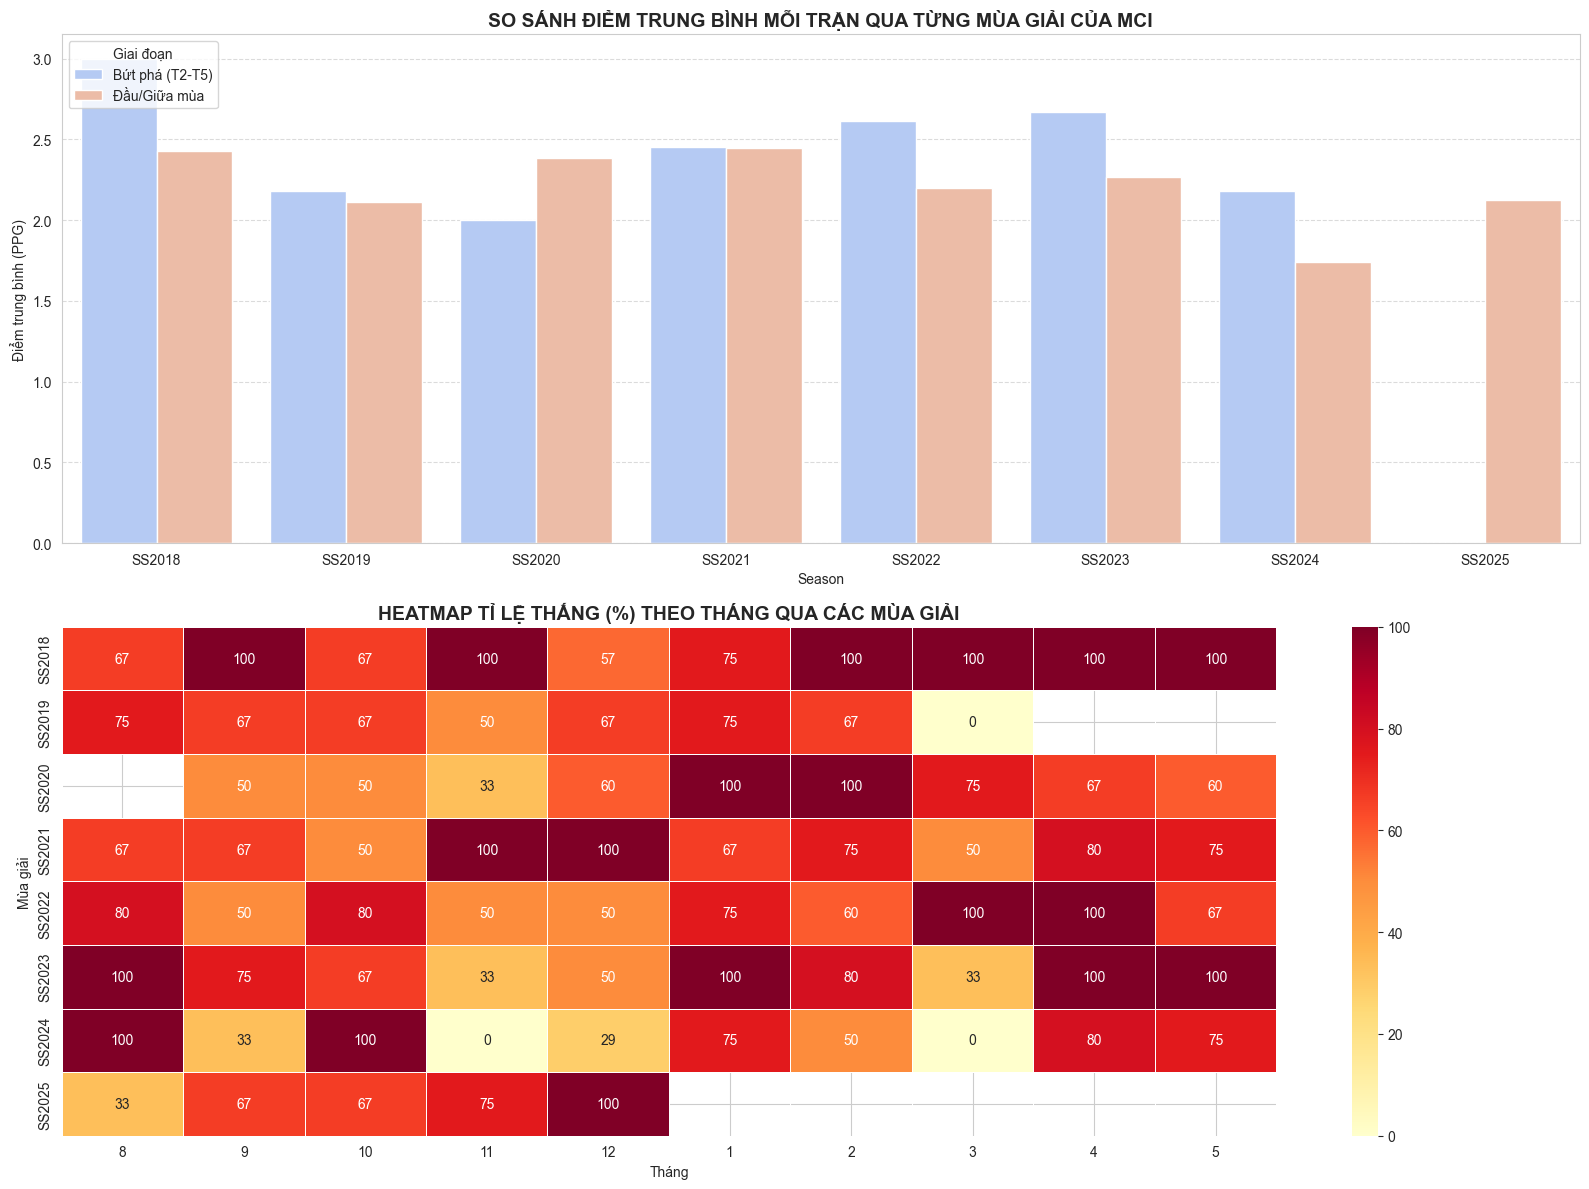


Bảng thống kê chi tiết sự chênh lệch qua các mùa:
Period  Bứt phá (T2-T5)  Đầu/Giữa mùa  Chênh lệch
Season                                           
SS2018             3.00          2.43        0.57
SS2019             2.18          2.11        0.07
SS2020             2.00          2.38       -0.38
SS2021             2.45          2.44        0.01
SS2022             2.62          2.20        0.42
SS2023             2.67          2.27        0.40
SS2024             2.18          1.74        0.44
SS2025              NaN          2.12         NaN


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Đọc file Excel
file_path = r"E:\project 1\data_clean\match_processed.xlsx"
df = pd.read_excel(file_path)

# 2. Làm sạch dữ liệu
df['Home Team'] = df['Home Team'].astype(str).str.strip()
df['Away Team'] = df['Away Team'].astype(str).str.strip()
team_name = 'MCI' # Tên đội theo yêu cầu của bạn

# 3. Lọc trận đấu của MCI
mci_matches = df[(df['Home Team'] == team_name) | (df['Away Team'] == team_name)].copy()

if mci_matches.empty:
    print(f"LỖI: Không tìm thấy đội '{team_name}'. Hãy kiểm tra lại cột Home Team/Away Team.")
else:
    # 4. Logic đảo ngược kết quả và tính điểm
    def get_mci_result(row):
        res = str(row['Result']).strip().upper()
        if row['Home Team'] == team_name:
            return res
        else:
            if res == 'W': return 'L'
            if res == 'L': return 'W'
            return 'D'

    mci_matches['MCI_Result'] = mci_matches.apply(get_mci_result, axis=1)
    mci_matches['Points'] = mci_matches['MCI_Result'].map({'W': 3, 'D': 1, 'L': 0})
    
    # 5. Xử lý thời gian
    mci_matches['Date'] = pd.to_datetime(mci_matches['Date'])
    mci_matches['Month'] = mci_matches['Date'].dt.month
    # Định nghĩa giai đoạn
    mci_matches['Period'] = mci_matches['Month'].apply(
        lambda x: 'Bứt phá (T2-T5)' if x in [3, 4, 5, 6, 7] else 'Đầu/Giữa mùa'
    )

    # 6. TRỰC QUAN HÓA SỰ BỨT PHÁ QUA CÁC MÙA GIẢI
    plt.figure(figsize=(16, 12))

    # BIỂU ĐỒ 1: So sánh Điểm trung bình từng mùa giải (Grouped Bar Chart)
    # Mục tiêu: Cho thấy trong TẤT CẢ các mùa, cột T2-T5 luôn cao hơn cột còn lại
    plt.subplot(2, 1, 1)
    season_stats = mci_matches.groupby(['Season', 'Period'])['Points'].mean().reset_index()
    
    sns.barplot(data=season_stats, x='Season', y='Points', hue='Period', palette='coolwarm')
    plt.title(f'SO SÁNH ĐIỂM TRUNG BÌNH MỖI TRẬN QUA TỪNG MÙA GIẢI CỦA {team_name}', fontsize=14, fontweight='bold')
    plt.ylabel('Điểm trung bình (PPG)')
    plt.legend(title='Giai đoạn', loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # BIỂU ĐỒ 2: Heatmap Tỉ lệ thắng theo Tháng và Mùa giải
    # Mục tiêu: Cho thấy các tháng 2, 3, 4, 5 thường xuyên "rực đỏ" (tỉ lệ thắng cao) qua các năm
    plt.subplot(2, 1, 2)
    # Tính tỉ lệ thắng theo Season và Month
    win_rate_pivot = mci_matches.pivot_table(
        index='Season', 
        columns='Month', 
        values='MCI_Result', 
        aggfunc=lambda x: (x == 'W').mean() * 100
    )
    
    # Sắp xếp cột theo thứ tự mùa giải bóng đá (Tháng 8 -> Tháng 5 năm sau)
    month_order = [8, 9, 10, 11, 12, 1, 2, 3, 4, 5]
    win_rate_pivot = win_rate_pivot.reindex(columns=month_order)

    sns.heatmap(win_rate_pivot, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=.5)
    plt.title(f'HEATMAP TỈ LỆ THẮNG (%) THEO THÁNG QUA CÁC MÙA GIẢI', fontsize=14, fontweight='bold')
    plt.xlabel('Tháng')
    plt.ylabel('Mùa giải')

    plt.tight_layout()
    plt.show()

    # 7. In bảng kiểm chứng
    print("\nBảng thống kê chi tiết sự chênh lệch qua các mùa:")
    pivot_stats = season_stats.pivot(index='Season', columns='Period', values='Points')
    pivot_stats['Chênh lệch'] = pivot_stats['Bứt phá (T2-T5)'] - pivot_stats['Đầu/Giữa mùa']
    print(pivot_stats.round(2))

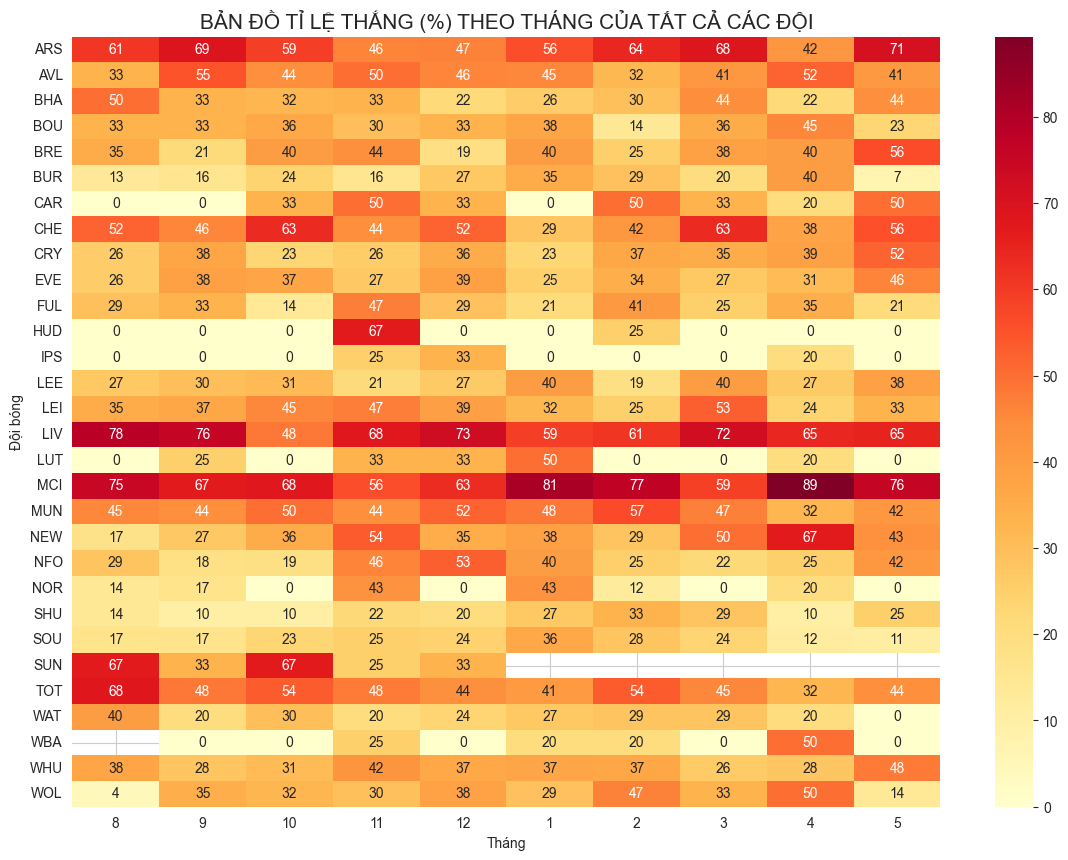

--- KẾT QUẢ KHAI PHÁ TỰ ĐỘNG ---
Đội ARS            : Thường bứt phá vào các tháng [9, 3, 5]
Đội AVL            : Thường bứt phá vào các tháng [9]
Đội BHA            : Thường bứt phá vào các tháng [8, 3, 5]
Đội BOU            : Thường bứt phá vào các tháng [4]
Đội BRE            : Thường bứt phá vào các tháng [5]
Đội BUR            : Thường bứt phá vào các tháng [1, 4]
Đội CAR            : Thường bứt phá vào các tháng [11, 2, 5]
Đội CHE            : Thường bứt phá vào các tháng [10, 3]
Đội CRY            : Thường bứt phá vào các tháng [5]
Đội EVE            : Thường bứt phá vào các tháng [5]
Đội FUL            : Thường bứt phá vào các tháng [11, 2]
Đội HUD            : Thường bứt phá vào các tháng [11, 2]
Đội IPS            : Thường bứt phá vào các tháng [11, 12, 4]
Đội LEI            : Thường bứt phá vào các tháng [11, 3]
Đội LIV            : Thường bứt phá vào các tháng [8]
Đội LUT            : Thường bứt phá vào các tháng [11, 12, 1]
Đội MCI            : Thường bứt phá vào các tháng

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Đọc và chuẩn bị dữ liệu (Xử lý đảo ngược kết quả cho tất cả các đội)
file_path = r"E:\project 1\data_clean\match_processed.xlsx"
df = pd.read_excel(file_path)

# Tạo danh sách tất cả các trận đấu dưới góc nhìn của từng đội (mỗi trận xuất hiện 2 lần cho 2 đội)
home_df = df[['Season', 'Date', 'Home Team', 'Result']].rename(columns={'Home Team': 'Team', 'Result': 'Res'})
away_df = df[['Season', 'Date', 'Away Team', 'Result']].rename(columns={'Away Team': 'Team', 'Result': 'Res'})

# Đảo ngược kết quả cho đội khách
away_df['Res'] = away_df['Res'].map({'W': 'L', 'L': 'W', 'D': 'D'})

# Gộp lại thành bảng tổng hợp
all_teams_matches = pd.concat([home_df, away_df])
all_teams_matches['Points'] = all_teams_matches['Res'].map({'W': 3, 'D': 1, 'L': 0})
all_teams_matches['Month'] = pd.to_datetime(all_teams_matches['Date']).dt.month

# 2. Tính toán tỉ lệ thắng trung bình theo Đội và Tháng
heatmap_data = all_teams_matches.pivot_table(
    index='Team', 
    columns='Month', 
    values='Res', 
    aggfunc=lambda x: (x == 'W').mean() * 100
)

# Sắp xếp tháng theo mùa giải (8 -> 5)
month_order = [8, 9, 10, 11, 12, 1, 2, 3, 4, 5]
heatmap_data = heatmap_data.reindex(columns=month_order)

# 3. Vẽ Bản đồ nhiệt tổng thể (Phát hiện xu hướng bằng mắt)
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".0f")
plt.title('BẢN ĐỒ TỈ LỆ THẮNG (%) THEO THÁNG CỦA TẤT CẢ CÁC ĐỘI', fontsize=15)
plt.xlabel('Tháng')
plt.ylabel('Đội bóng')
plt.show()

# 4. THUẬT TOÁN TỰ ĐỘNG PHÁT HIỆN "ĐỘI BÓNG MÙA VỤ"
print("--- KẾT QUẢ KHAI PHÁ TỰ ĐỘNG ---")
for team in heatmap_data.index:
    row = heatmap_data.loc[team]
    peak_months = row[row > row.mean() + 10].index.tolist() # Tìm các tháng cao hơn trung bình 10%
    
    if peak_months:
        print(f"Đội {team:15}: Thường bứt phá vào các tháng {peak_months}")